### CMPE462 (Machine Learning) | Homework 1 | Cemal Burak Aygün (2014400072)

In [1]:
# Allowed libraries
import numpy as np
import matplotlib.pyplot as plt
# For loading data, you can import other libraries, but further usage is not allowed.

### 1.) Review bias/variance dilemma.
Replicate the bias-variance-plot (bias,
variance and error vs. model complexity) given in Figure 4.6 in the textbook
or in lecture notes [W04.pdf, pg.52]. For this:

* Generate 20 values {$x^t$} from the range [0, 5] from uniform distribution.  
* Generate 100 different samples $X_s$. Each sample contains 20 instances {$x^t, y^t_s$} where $y^t_s = f(x^t) + \epsilon$, $f(x) =2× sin(1.5 × x)$, and $ \epsilon ∼ N (0, 1)$.
* For each sample, fit polynomial models of order 1,3, and 5.
* Plot bias, variance and error of these models.

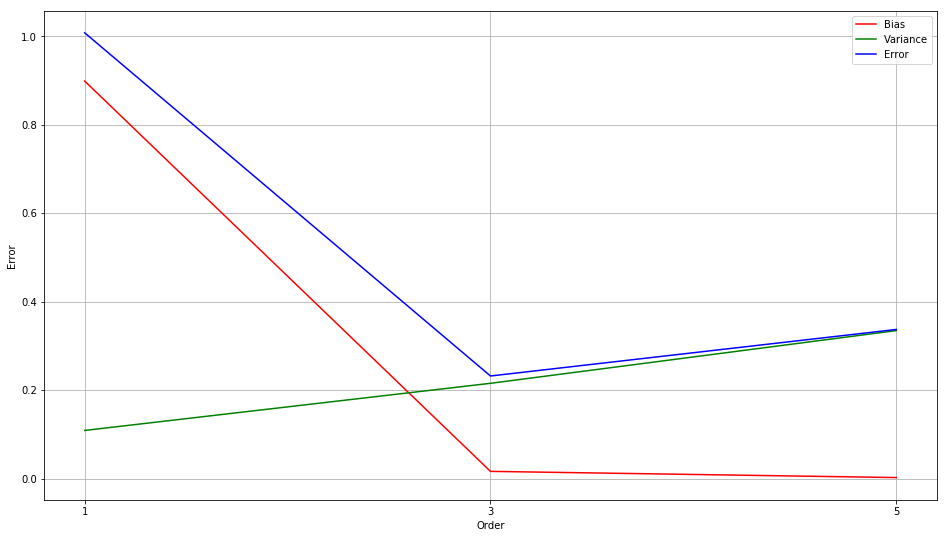

In [2]:
# Solution Here
FIGURE_SIZE = (16, 9)  # Size of the plots

def mean_squared_error(vector1, vector2):
	"""
	Returns the Mean Squared Error (MSE) of the given vectors.
	"""
	return np.mean(
		np.vectorize(
			lambda value1, value2: (value1 - value2)**2
		)(vector1, vector2)
	)


def f(x):
	"""
	This is the f(.) function given in the problem as y = f(x) + e
	"""
	return 2 * np.sin(1.5 * x)


def epsilon():
	"""
	This is the epsilon (e) given in the problem as y = f(x) + e
	"""
	return np.random.normal(0, 1)  # ~ N(0,1)


POLYNOMIAL_ORDERS = (1, 3, 5)


# %%%%% Problem 1 Solution

P1_SAMPLE_SIZE = 100
P1_INSTANCE_SIZE = 20

# Maps polynomial-orders to a list of numpy.poly1d objects.
# This will store the polynomials fitted to the samples.
polynomials = {}

# Maps polynomial-order to a numpy.poly1d object.
# This will store a polynomial that is the mean of the corresponding-order polynomials in `polynomials`.
mean_polynomial = {}


def estimated_bias_square(g_bar, f, xt_vals):
	"""
	This is the formula stated on the page 81 of the textbook.
	:param g_bar: A numpy.poly1d object
	:param f: A function
	:param xt_vals: A list of data points
	"""
	return mean_squared_error(
		list(map(lambda xt: g_bar(xt), xt_vals)),
		list(map(lambda xt: f(xt), xt_vals))
	)


def estimated_variance(polynomials, g_bar, xt_vals):
	"""
	This is the formula stated on the page 81 of the textbook.
	:param polynomials: A list of numpy.poly1d objects (referred to as g_i in the textbook)
	:param g_bar: A numpy.poly1d object
	:param xt_vals: A list of data points
	"""
	temp_result = 0
	for g_i in polynomials:
		temp_array = list(
			map(
				lambda xt: (g_i(xt) - g_bar(xt))**2,
				xt_vals
			)
		)
		temp_result += sum(temp_array)

	return temp_result / (len(xt_vals) * len(polynomials))


xt_values = np.random.uniform(low=0, high=5, size=P1_INSTANCE_SIZE)

yt_samples = []  # List of all samples. Only the yt-values are stored since xt-values are the same for each sample.
for _ in range(P1_SAMPLE_SIZE):
	yt_values = list(map(lambda xt: f(xt) + epsilon(), xt_values))  # y = f(x) + e
	yt_samples.append(yt_values)


for order in POLYNOMIAL_ORDERS:
	polynomials[order] = []

	for yt_values in yt_samples:
		coefficients = np.polynomial.polynomial.polyfit(xt_values, yt_values, order)
		polynomials[order].append(np.poly1d(np.flip(coefficients)))

	mean_polynomial[order] = sum(polynomials[order]) / len(polynomials[order])


bias_values = []  # List of (estimated) bias (square) values in the polynomial-order order
variance_values = []  # List of (estimated) variance values in the polynomial-order order
error_values = []  # List of bias (square) values in the polynomial-order order

for order in POLYNOMIAL_ORDERS:
	bias_square = estimated_bias_square(mean_polynomial[order], f, xt_values)
	variance = estimated_variance(polynomials[order], mean_polynomial[order], xt_values)

	bias_values.append(bias_square)
	variance_values.append(variance)
	error_values.append(bias_square + variance)

plt.figure(figsize=FIGURE_SIZE)
    
# Plot bias, variance and the total error on the same figure
plt.plot(POLYNOMIAL_ORDERS, bias_values, 'r-', label="Bias")
plt.plot(POLYNOMIAL_ORDERS, variance_values, 'g-', label="Variance")
plt.plot(POLYNOMIAL_ORDERS, error_values, 'b-', label="Error")

plt.grid(True)
plt.legend()
plt.xlabel("Order")
plt.ylabel("Error")
plt.xticks(np.arange(1, 6, 2))
plt.show()

### 2.) Review cross-validation.
Replicate the cross-validation error plot (training and validation error vs. model complexity plot) given in Figure 4.7 in the textbook or in lecture notes [W04.pdf, pg52]. For this:
* Generate 10 samples containing 100 instances as in part 1.
* Split each sample to training and validation sets, fit polynomial models of order 1,3, and 5.
* Plot mean training and validation error (mean square error) of each model.

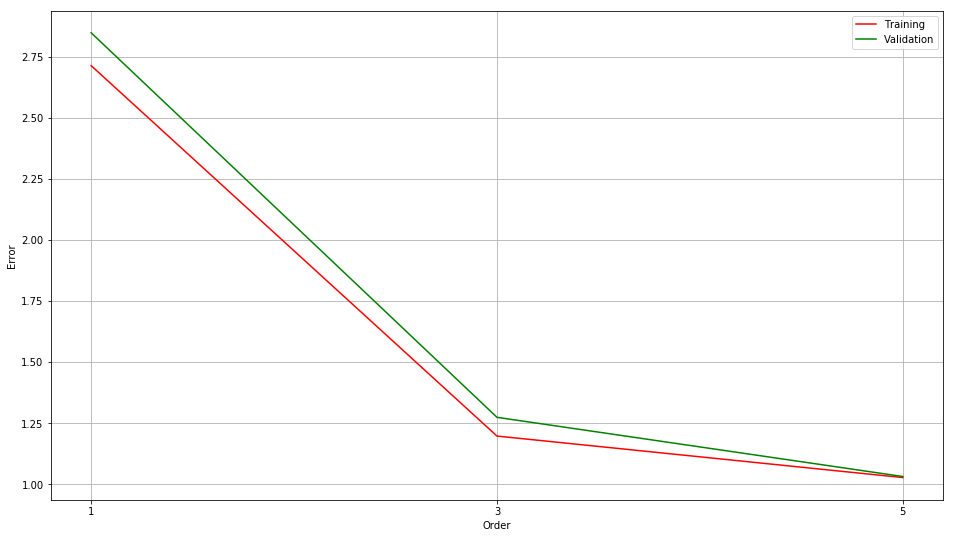

In [3]:
# Solution Here

P2_SAMPLE_SIZE = 10
P2_INSTANCE_SIZE = 100

# Maps polynomial-orders to a list of numpy.poly1d objects.
# This will store the polynomials fitted to the samples.
polynomials = {}

# Maps polynomial-order to a numpy.poly1d object.
# This will store a polynomial that is the mean of the corresponding-order polynomials in `polynomials`.
mean_polynomial = {}

xt_values = np.random.uniform(low=0, high=5, size=P2_INSTANCE_SIZE)

training_set = []
validation_set = []

for _ in range(P2_SAMPLE_SIZE):
	yt_values = list(map(lambda xt: f(xt) + epsilon(), xt_values))  # y = f(x) + e

	indices = np.random.permutation(len(xt_values))  # Shuffles (indices of) xt values
	half_instance_size = int(P2_INSTANCE_SIZE/2)
	training_indices = indices[:half_instance_size]    # Assigns the first half to training set
	validation_indices = indices[half_instance_size:]  # Assigns the second half to validation set

	training_set.append(
		(
			[xt_values[index] for index in training_indices],
			[yt_values[index] for index in training_indices]
		)
	)

	validation_set.append(
		(
			[xt_values[index] for index in validation_indices],
			[yt_values[index] for index in validation_indices]
		)
	)


for order in POLYNOMIAL_ORDERS:
	polynomials[order] = []

	for (xt_vals, yt_vals) in training_set:
		coefficients = np.polynomial.polynomial.polyfit(xt_vals, yt_vals, order)
		polynomials[order].append(np.poly1d(np.flip(coefficients)))

	mean_polynomial[order] = sum(polynomials[order]) / len(polynomials[order])


mean_training_errors = []    # Stores mean training errors in polynomial-order order
mean_validation_errors = []  # Stores mean validation errors in polynomial-order order

for order in POLYNOMIAL_ORDERS:
	estimated_polynomial = mean_polynomial[order]

	for sample_set in (training_set, validation_set):
		mse_of_samples = []  # Mean Squared Error values of samples

		# `sample_set` consists of tuples of two lists: first one stores xt-values, second one stores yt-values
		for (xt_vals, yt_vals) in sample_set:
			mse_of_samples.append(mean_squared_error(
				yt_vals,
				list(map(lambda xt: estimated_polynomial(xt), xt_vals))
			))

		if sample_set == training_set:
			mean_training_errors.append(np.mean(mse_of_samples))
		else:
			mean_validation_errors.append(np.mean(mse_of_samples))


plt.figure(2, figsize=FIGURE_SIZE)  # Creates new figure for problem 2.

# Plot mean training and validation erros on the same figure
plt.plot(POLYNOMIAL_ORDERS, mean_training_errors, 'r-', label="Training")
plt.plot(POLYNOMIAL_ORDERS, mean_validation_errors, 'g-', label="Validation")

plt.grid(True)
plt.legend()
plt.xlabel("Order")
plt.ylabel("Error")
plt.xticks(np.arange(1, 6, 2))
plt.show()

### 3.) Use of real dataset. 
Download Iris Data Set from UCI Machine Learning Repository. Randomly split it into training and test sets.
* For each feature, plot histogram of classes. For better visualiziation, plot classes in same plot but with different colors. (For this you can use plt.subplots)
* Consider only two classes: Iris Setosa and Iris Versicolour.
* Assuming Gaussian distribution, apply parametric classification, and find which particular feature (sepal length, sepal width, petal length, petal width) is most successful in classifying instances.
    - For this, treat each feature separately. find maximum likelihood estimate of the parameters $(μ, σ^2)$ of different classes using training set. (You can use plt.errorbar for visualization, use one column for each feature and visualize both classes in same plot using different colors).
    - Using these parameters, predict the classes of the instances in the test set, and calculate the error.

Sepal Length	ERROR:	0.11538
Sepal Width	ERROR:	0.19231
Petal Length	ERROR:	0.05769
Petal Width	ERROR:	0.01923


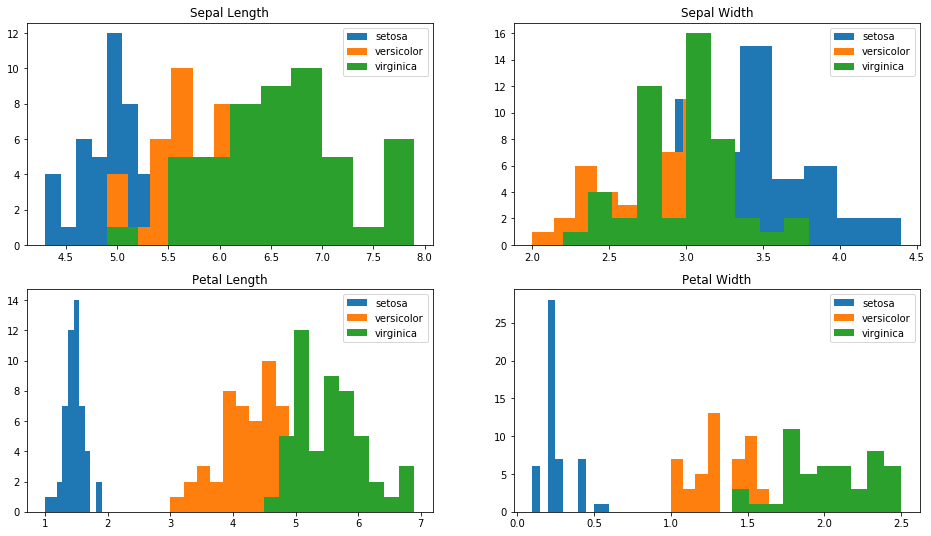

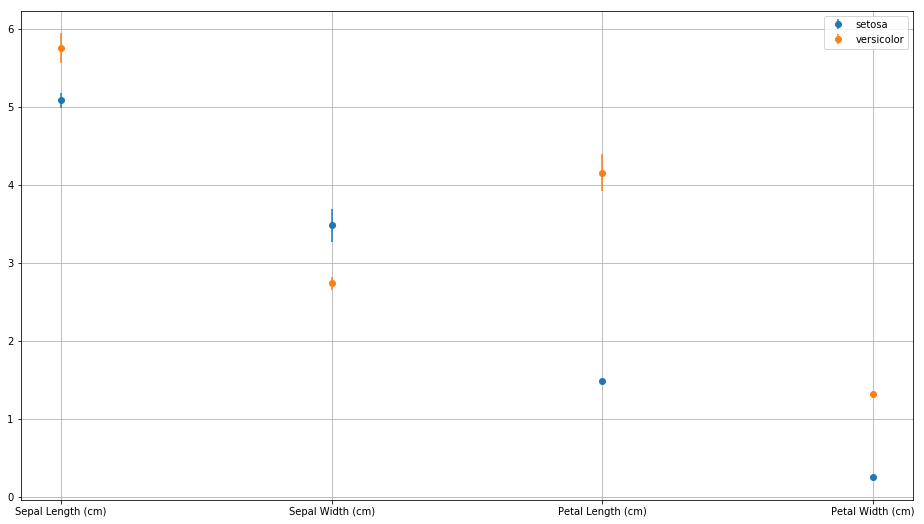

In [4]:
# Solution Here

klasses = ['setosa', 'versicolor', 'virginica']  # Iris data set classes

attributes = (0, 1, 2, 3)
attribute_names = {0: 'Sepal Length', 1: 'Sepal Width', 2: 'Petal Length', 3: 'Petal Width'}

# Maps class names to a list of attributes.
# Each attribute is a 4-tuple of Sepal Length, Sepal Width, Petal Length and Petal Width.
iris_data = {}
for klass in klasses:
	iris_data[klass] = []

with open("iris.data") as iris_file:
	for line in iris_file.readlines():
		if len(line.strip()) == 0:
			continue  # Skips empty lines.

		(sepal_length, sepal_width, petal_length, petal_width, klass) = line.strip().split(',')
		iris_data[klass.split('-')[1]].append(
			(float(sepal_length), float(sepal_width), float(petal_length), float(petal_width))
		)

plt.figure(3, figsize=FIGURE_SIZE)  # Creates new figure for problem 3.
        
# Plot histograms
for attribute in attributes:
	plt.subplot(2, 2, attribute + 1)

	for klass in klasses:
		x = list(map(lambda d: d[attribute], iris_data[klass]))  # Gets a list of related attribute for a class.

		plt.hist(x, 10, label=klass)
		plt.title(attribute_names[attribute])
		plt.legend()


klasses.remove('virginica')  # We consider only two classes: Iris Setosa and Iris Versicolor.

# Maps class names to a list of attributes.
# Each attribute is a 4-tuple of Sepal Length, Sepal Width, Petal Length and Petal Width.
iris_train_set = {}

# Contains 5-tuples of Sepal Length, Sepal Width, Petal Length, Petal Width and class name.
iris_test_set = []

for klass in klasses:
	iris_train_set[klass] = []

	for instance in iris_data[klass]:
		if np.random.rand() < 0.5:  # Randomly splits the data set into traning and test sets.
			iris_train_set[klass].append(instance)
		else:
			iris_test_set.append(instance + (klass,))  # `data` is a 4-tuple of attributes.


def discriminant(x, m_i, s_i, prob_of_klass):
	"""
	This is the discriminant function for a Gaussian distribution.
	See the equation (4.28) on page 75 of the textbook.
	:param x: Data point
	:param m_i: (estimated) mean
	:param s_i: (estimated) variance
	:param prob_of_klass: (estimated) probability of the class (i.e., P(C_i))
	"""
	return (-1) * np.log(s_i) - (x - m_i)**2 / (2 * (s_i**2)) + np.log(prob_of_klass)


mean_values = {}
variance_values = {}

train_data_count = 0  # Used for estimating the probability of an Iris class.

for klass in klasses:
	mean_values[klass] = []
	variance_values[klass] = []
	train_data_count += len(iris_train_set[klass])

for attribute in attributes:
	klass_stats = {}  # Statistics of an Iris class.

	for klass in klasses:
		prob_of_klass = len(iris_train_set[klass]) / train_data_count

		attribute_values = list(map(lambda data: data[attribute], iris_train_set[klass]))
		sample_mean = np.mean(attribute_values)
		sample_variance = np.var(attribute_values)

		klass_stats[klass] = (sample_mean, sample_variance, prob_of_klass)

		mean_values[klass].append(sample_mean)
		variance_values[klass].append(sample_variance)

	error = 0  # Number of unsuccessful tests.

	for instance in iris_test_set:
		test_instance_class = instance[4]  # Class name of the test instance.

		klass1_discriminant_value = discriminant(instance[attribute], *klass_stats[klasses[0]])
		klass2_discriminant_value = discriminant(instance[attribute], *klass_stats[klasses[1]])

		if klass1_discriminant_value > klass2_discriminant_value:
			if test_instance_class != klasses[0]:
				error += 1
		elif test_instance_class != klasses[1]:
			error += 1

	print("{0}\tERROR:\t{1:.5f}".format(attribute_names[attribute], error / len(iris_test_set)))

plt.figure(4, figsize=FIGURE_SIZE)  # Creates new figure for problem 3.
plt.errorbar(attributes, mean_values[klasses[0]], yerr=variance_values[klasses[0]], fmt='o', label=klasses[0])
plt.errorbar(attributes, mean_values[klasses[1]], yerr=variance_values[klasses[1]], fmt='o', label=klasses[1])
plt.legend()
plt.grid(True)
plt.xticks(attributes, list(map(lambda attr: "{0} (cm)".format(attribute_names[attr]), attributes)))
plt.show()

"Petal Length" and "Petal Width" have the mininum error values. Error values of these attributes get close to each other from run to run. Though, error of "Petal Width" seems to be smaller than the error of "Petal Length" on the average. Also, we can see that "Petal Width" has the minimum variance on both classes. Hence, we can say that "Petal Width" is the most successful attribute in classifying the instances.